## APE runs SSH variance.

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
#vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
#area_t = nc.variables['area_t'][:]
#dxt = nc.variables['dxt'][:]
#dyt = nc.variables['dyt'][:]
#kmu = nc.variables['kmu'][:]
#kmt = nc.variables['kmt'][:]
#ht = nc.variables['ht'][:]
#fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

(1080, 1440)


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.9.6


In [4]:
CntrlDir = '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_cp/output550/'
UPDir = '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_UP/output550/'
SHDir = '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_SH/output550/'
PIDir = '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_PI/output550/'
#DwnDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z_Dwn/'

ExpDirs=[CntrlDir, UPDir,SHDir, PIDir]
print ExpDirs

['/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_cp/output550/', '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_UP/output550/', '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_SH/output550/', '/g/data1legacy/v45/APE-MOM/gfdl_nyf_1080_PI/output550/']


In [16]:
file ='/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output550/ocean.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
cntrl_ssh = nc.variables['sea_level'][:]
cntrl_sshsq = nc.variables['sea_levelsq'][:]
cntrl_mld = nc.variables['mld'][:]
cntrl_rho = nc.variables['pot_rho_0'][:]
nc.close() # close the file

print cntrl_ssh.shape
print cntrl_sshsq.shape

file ='/g/data1/v45/APE-MOM/gfdl_nyf_1080_UP/output550/ocean.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
up_ssh = nc.variables['sea_level'][:]
up_sshsq = nc.variables['sea_levelsq'][:]
up_mld = nc.variables['mld'][:]
up_rho = nc.variables['pot_rho_0'][:]
nc.close() # close the file

print up_ssh.shape
print up_sshsq.shape

file ='/g/data1/v45/APE-MOM/gfdl_nyf_1080_PI/output550/ocean.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
pi_ssh = nc.variables['sea_level'][:]
pi_sshsq = nc.variables['sea_levelsq'][:]
pi_mld = nc.variables['mld'][:]
pi_rho = nc.variables['pot_rho_0'][:]
nc.close() # close the file

print pi_ssh.shape
print pi_sshsq.shape

file ='/g/data1/v45/APE-MOM/gfdl_nyf_1080_SH/output550/ocean.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
sh_ssh = nc.variables['sea_level'][:]
sh_sshsq = nc.variables['sea_levelsq'][:]
sh_mld = nc.variables['mld'][:]
sh_rho = nc.variables['pot_rho_0'][:]
nc.close() # close the file

print sh_ssh.shape
print sh_sshsq.shape


(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)


In [6]:
cntrl=(cntrl_sshsq-(cntrl_ssh*cntrl_ssh))*100*100
print cntrl.shape

pi=(pi_sshsq-(pi_ssh*pi_ssh))*100*100
print pi.shape

sh=(sh_sshsq-(sh_ssh*sh_ssh))*100*100
print sh.shape

up=(up_sshsq-(up_ssh*up_ssh))*100*100
print up.shape


(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:1006: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


[200]
[ 1026.9  1027.1]


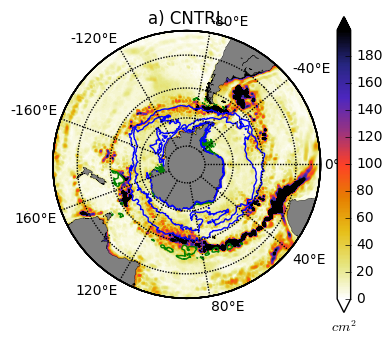

In [18]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(0,200,1)
clev3 = np.arange(200,201,100)
clev4 = np.arange(1026.9,1027.2,.2)

print clev3
print clev4

plt.subplot(221)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl[0], cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$cm^2$')
map.contour(X,Y,cntrl_mld[0],levels=clev3,colors='g',linewidths=1)
map.contour(X,Y,cntrl_rho[0,0,:,:],levels=clev4,colors='b',linewidths=1)
plt.title('a) CNTRL')

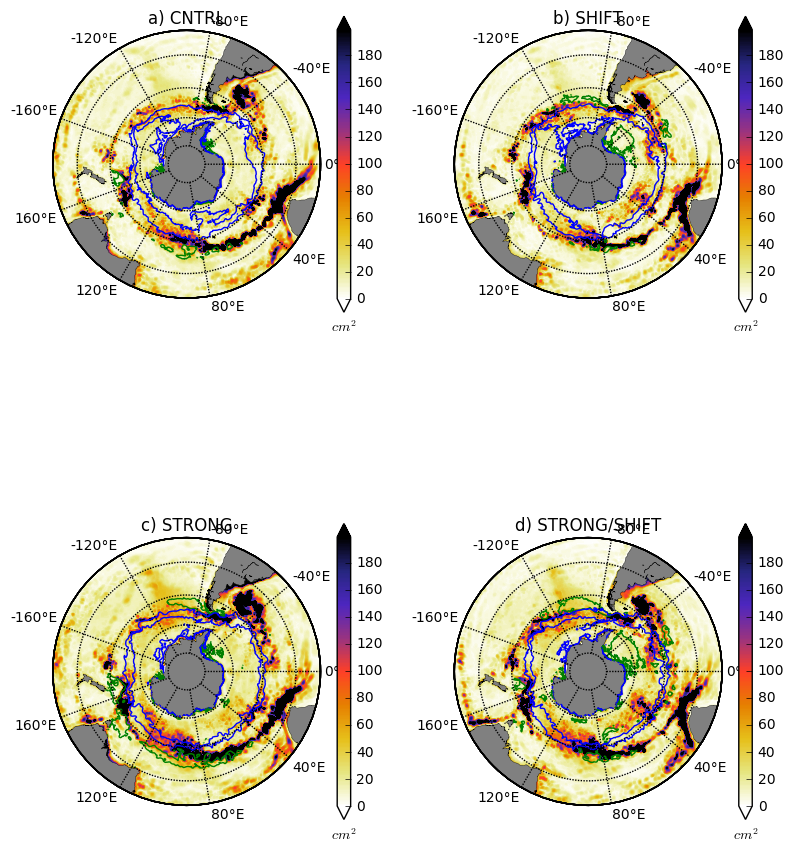

In [22]:
#plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(221)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl[0], cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$cm^2$')
map.contour(X,Y,cntrl_mld[0],levels=clev3,colors='g',linewidths=1)
map.contour(X,Y,cntrl_rho[0,0,:,:],levels=clev4,colors='b',linewidths=1)
plt.title('a) CNTRL')

plt.subplot(222)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,sh[0], cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$cm^2$')
map.contour(X,Y,sh_mld[0],levels=clev3,colors='g',linewidths=1)
map.contour(X,Y,sh_rho[0,0,:,:],levels=clev4,colors='b',linewidths=1)
plt.title('b) SHIFT')


plt.subplot(223)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,up[0], cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$cm^2$')
map.contour(X,Y,up_mld[0],levels=clev3,colors='g',linewidths=1)
map.contour(X,Y,up_rho[0,0,:,:],levels=clev4,colors='b',linewidths=1)
plt.title('c) STRONG')


plt.subplot(224)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pi[0], cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$cm^2$')
map.contour(X,Y,pi_mld[0],levels=clev3,colors='g',linewidths=1)
map.contour(X,Y,pi_rho[0,0,:,:],levels=clev4,colors='b',linewidths=1)
plt.title('d) STRONG/SHIFT')


plt.savefig('SSHVar.pdf',dpi=100)

In [18]:
import netCDF4 as nc4
ofile = nc4.Dataset('/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output550/sshvar_cntrl_cm2.nc', 'a')

var = ofile.variables['sea_level']
print var.shape
print cntrl.shape
var[:] = cntrl

ofile.sync()
ofile.close()

ofile = nc4.Dataset('/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output550/sshvar_pi_cm2.nc', 'a')

var = ofile.variables['sea_level']
print var.shape
print pi.shape
var[:] = pi

ofile.sync()
ofile.close()

ofile = nc4.Dataset('/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output550/sshvar_up_cm2.nc', 'a')

var = ofile.variables['sea_level']
print var.shape
print up.shape
var[:] = up

ofile.sync()
ofile.close()

ofile = nc4.Dataset('/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output550/sshvar_sh_cm2.nc', 'a')

var = ofile.variables['sea_level']
print var.shape
print sh.shape
var[:] = sh

ofile.sync()
ofile.close()

(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)
(1, 1080, 1440)


In [28]:
#calculate SSS restoring salt flux relative to P-E+R

file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output200/ocean.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
srest = nc.variables['sfc_salt_flux_restore'][:]
pmer = nc.variables['pme_river'][:]
yt = nc.variables['yt_ocean'][:]
nc.close() # close the file

#kg/m2/s

print pmer.shape
print srest.shape
print yt.shape

(1, 1080, 1440)
(1, 1080, 1440)
(1080,)


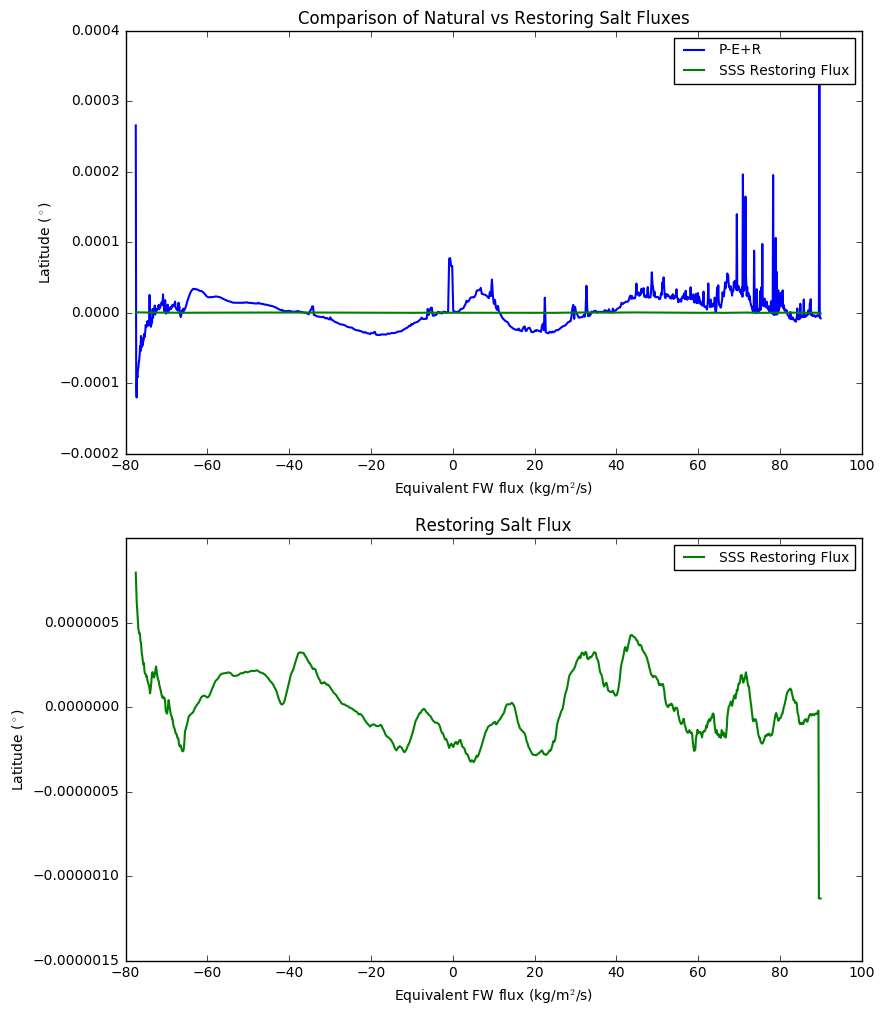

In [37]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(211)
plt.plot(yt,np.mean(pmer[0],axis=1),linestyle='-',color='b',label='P-E+R',linewidth=1.5)
plt.plot(yt,np.mean(srest[0],axis=1),linestyle='-',color='g',label='SSS Restoring Flux',linewidth=1.5)
#plt.plot(up35N_psj_ts,linestyle='-',color='g',label='Strong',linewidth=1.5)
#plt.plot(cntrl35N_psj_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Equivalent FW flux (kg/m$^2$/s)')
#plt.xlim([-75,85])
plt.title('Comparison of Natural vs Restoring Salt Fluxes')
plt.legend(fontsize=10)

plt.subplot(212)
#plt.plot(yt,np.mean(pmer[0],axis=1),linestyle='-',color='b',label='P-E+R',linewidth=1.5)
plt.plot(yt,np.mean(srest[0],axis=1),linestyle='-',color='g',label='SSS Restoring Flux',linewidth=1.5)
#plt.plot(up35N_psj_ts,linestyle='-',color='g',label='Strong',linewidth=1.5)
#plt.plot(cntrl35N_psj_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Equivalent FW flux (kg/m$^2$/s)')
#plt.xlim([-75,85])
plt.title('Restoring Salt Flux')
plt.legend(fontsize=10)

plt.savefig('SSSRest.pdf',dpi=300)